# Strategies

In [102]:
class Alternator():
    def __init__(self):
        self.name = 'Alternator'
    
    def play(self, own_move, op_move, round):
        if own_move == 'start':
            return 'C'
        
        if own_move == 'C':
            return 'D'
        else:
            return 'C'

In [103]:
class Appeaser():
    def __init__(self):
        self.name = 'Appeaser'
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        else:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
            
            if self.op_history[-1] == 'D':
                if self.own_history[-1] == 'C':
                    return 'D'
                else:
                    return 'C'

In [104]:
import random

class AverageCopier():
    def __init__(self):
        self.name = 'AverageCopier'
        self.own_history = []
        self.op_history = []
        self.op_cooperations = 0
    
    def play(self, own_move, op_move, round):
        """Actual strategy definition that determines player's action."""
        if round == 1:
            k = random.randint(0, 1)

            if k == 1:
                return 'C'
            else:
                return 'D'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if op_move == 'C':
            self.op_cooperations += 1

        p = self.op_cooperations / len(self.op_history)
        
        if random.random() > p:
            return 'D'
        else:
            return 'C'

In [105]:
import random

class BetterAndBetter():
    def __init__(self):
        self.name = 'BetterAndBetter'
        self.own_history = []
        self.op_history = []
        self.op_cooperations = 0
    
    def play(self, own_move, op_move, round):
        """Actual strategy definition that determines player's action."""
        if round == 1:
            return 'D'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        p = len(self.op_history) / 1000
        
        if random.random() > p:
            return 'D'
        else:
            return 'C'

In [106]:
class Cooperator():
    def __init__(self):
        self.name = 'Cooperator'
    
    def play(self, own_move, op_move, round):
        return 'C'

In [107]:
class Davis():
    def __init__(self):
        self.name = 'Davis'
    
    def play(self, own_move, op_move, round):
        if round <= 10:
            return 'C'
        else:
            return op_move

In [108]:
class Defector():
    def __init__(self):
        self.name = 'Defector'
    
    def play(self, own_move, op_move, round):
        return 'D'

In [165]:
class Downing():
    def __init__(self):
        self.name = 'Downing'
        self.op_history = []
        self.own_history = []
        self.number_opponent_C_in_response_to_C = 0
        self.number_opponent_C_in_response_to_D = 0

        self.cooperations = 0
        self.defections = 0
    
    def play(self, own_move, op_move, round):
        """Actual strategy definition that determines player's action."""

        if round == 1:
            return 'D'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if round == 2:
            if self.op_history[-1] == 'C':
                self.number_opponent_C_in_response_to_C += 1
            return 'D'

        if self.own_history[-2] == 'C' and self.op_history[-1] == 'C':
            self.number_opponent_C_in_response_to_C += 1
        if self.own_history[-2] == 'D' and self.op_history[-1] == 'C':
            self.number_opponent_C_in_response_to_D += 1

        # Adding 1 to cooperations for assumption that first opponent move
        # being a response to a cooperation. See docstring for more
        # information.
        alpha = self.number_opponent_C_in_response_to_C / (
            self.cooperations + 1
        )
        # Adding 2 to defections on the assumption that the first two
        # moves are defections, which may not be true in a noisy match
        beta = self.number_opponent_C_in_response_to_D / max(
            self.defections, 2
        )
        expected_value_of_cooperating = alpha * 3 + (1 - alpha) * 0
        expected_value_of_defecting = beta * 5 + (1 - beta) * 1

        if expected_value_of_cooperating > expected_value_of_defecting:
            return 'C'
        if expected_value_of_cooperating < expected_value_of_defecting:
            return 'D'
        return self.own_history[-1].flip()

In [166]:
import random

class Punisher():
    def __init__(self):
        self.name = 'Punisher'
        self.own_history = []
        self.op_history = []
        self.op_defections = 0
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if op_move == 'D':
            self.op_defections += 1
        
        if self.op_defections == 0:
            return 'C'
        else:
            return 'D'

In [167]:
class TitForTat():
    def __init__(self):
        self.name = 'TitForTat'
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if own_move == 'start':
            return 'C'

        self.op_history.append(op_move)
        return self.op_history[-1]

In [168]:
strategies = [Alternator(), Appeaser(), AverageCopier(), BetterAndBetter(), Cooperator(), Davis(), Defector(), Downing(), Punisher(), TitForTat()]

# Payoff

In [170]:
class PayOffMatrix():
    def __init__(self, default=True):
        self.default = default
        self.default_payoff = {('C', 'C'): [3, 3],
                       ('C', 'D'): [0, 5],
                       ('D', 'C'): [5, 0],
                       ('D', 'D'): [1, 1]
                       }
    
    def return_payoff(self):
        if self.default == True:
            return self.default_payoff
        else:
            return self.user_define()

    def user_define(self):
        user_payoff = {}

        user_payoff[('C', 'C')] = input('What is the payoff for Cooperation and Cooperation?')
        user_payoff[('C', 'D')] = input('What is the payoff for Cooperation and Defection?')
        user_payoff[('D', 'C')] = input('What is the payoff for Defection and Cooperation?')
        user_payoff[('D', 'D')] = input('What is the payoff for Defection and Defection?')

        return user_payoff

# Defining a Game

In [171]:
import matplotlib.pyplot as plt
from payoffs import PayOffMatrix
from strategies.tit_for_tat import TitForTat
from strategies.defector import Defector
from strategies.alternator import Alternator
from strategies.better_and_better import BetterAndBetter

class Game():
    def __init__(self, player1, player2, payoff, rounds, visualize = False):
        self.p1 = player1
        self.p2 = player2
        self.rounds = rounds
        self.payoff = payoff
        self.visualize = visualize
    
    def play(self):
        p1_score = 0
        p2_score = 0

        p1_history = []
        p2_history = []

        p1Move = self.p1.play(own_move = 'start', op_move = 'C', round = 1)
        p2Move = self.p2.play(own_move = 'start', op_move = 'C', round = 1)

        for round in range(2, self.rounds+1):
            if p1Move == 'C' and p2Move =='C':  
                p1_score += self.payoff['C', 'C'][0]
                p2_score += self.payoff['C', 'C'][1]

            elif p1Move == 'C' and p2Move =='D':
                p1_score += self.payoff['C', 'D'][0]
                p2_score += self.payoff['C', 'D'][1]

            elif p1Move == 'D' and p2Move =='C':
                p1_score += self.payoff['D', 'C'][0]
                p2_score += self.payoff['D', 'C'][1]
            
            elif p1Move == 'D' and p2Move =='D':
                p1_score += self.payoff['D', 'D'][0]
                p2_score += self.payoff['D', 'D'][1]
            
            p1_history.append(p1Move)
            p2_history.append(p2Move)

            prev_p1Move = p1Move
            prev_p2Move = p2Move
            
            p1Move = self.p1.play(prev_p1Move, prev_p2Move, round)
            p2Move = self.p2.play(prev_p2Move, prev_p1Move, round)
        
        self.visualize_result(self.visualize, p1_history=p1_history, p2_history=p2_history)
    
        if self.visualize == True:
            if p1_score>p2_score:
                print(self.p1.name,'beats',self.p2.name,p1_score,'-',p2_score)
            elif p2_score>p1_score:    
                print(self.p2.name,'beats',self.p1.name,p2_score,'-',p1_score)
            else:
                print('it was a draw',self.p1.name,p1_score,self.p2.name,p2_score)
        
        return p1_score, p2_score
    
    # Function to plot circles
    def add_circle(self, ax, color, x, y):
        circle = plt.Circle((x, y), 0.1, color=color)
        ax.add_artist(circle)

    def visualize_result(self, visualize, p1_history, p2_history):
        if visualize == False:
            return
        
        # Initialize figure and axes for two rows
        fig, axs = plt.subplots(2, 1, figsize=(5, 5))
        plt.xlim(0, self.rounds-1)
        plt.ylim(0, 1)

        # Iteratively add circles to two rows
        for round in range(self.rounds-1):
            if p1_history[round] == 'C':
                c1 = 'green'
            else:
                c1 = 'red'
            
            if p2_history[round] == 'C':
                c2 = 'green'
            else:
                c2 = 'red'

            # Add red circle in the first row
            self.add_circle(axs[0], c1, round, 0.5)
            
            # Add green circle in the second row
            self.add_circle(axs[1], c2, round, 0.5)

        # Set limits and aspect ratio
        for ax in axs:
            ax.set_xlim(0, self.rounds)
            ax.set_ylim(0, 1)
            ax.set_aspect('equal')

        plt.show()

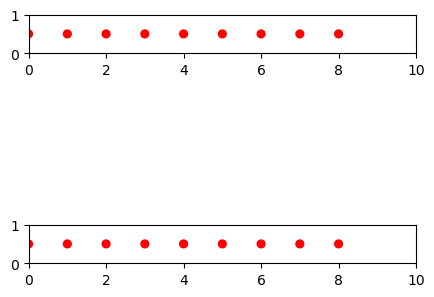

it was a draw Downing 9 Defector 9


(9, 9)

In [172]:
payoff_mat = PayOffMatrix().return_payoff()
game = Game(player1=Downing(), player2=Defector(), payoff=payoff_mat, rounds=10, visualize=True)
game.play()

# Defining a Tournament

In [197]:
from match import Game
from strategies import *
from payoffs import PayOffMatrix
import glob
import importlib
import inspect
import os

class Tournament():
    def __init__(self, players):
        self.players = players
        self.scores = {}
        self.rounds = 10

        for player in self.players:
            self.scores[player.name] = 0
    
    def play(self):
        for i in range(len(self.players)):
            for j in range(i+1, len(self.players)):
                if i != j:
                    payoff_mat = PayOffMatrix().return_payoff()
                    game = Game(player1=self.players[i], player2=self.players[j], payoff=payoff_mat, rounds=self.rounds, visualize=False)
                    s1, s2 = game.play()
                    print(self.players[i].name, s1)
                    print(self.players[j].name, s2)
                    self.scores[self.players[i].name] += s1
                    self.scores[self.players[j].name] += s2
    
    def show_result(self):
        print(dict(sorted(self.scores.items(), key=lambda item: item[1], reverse=True)))

In [201]:
strategies = []

for i in range(20):
    strategies.append(Defector())

for i in range(10):
    strategies.append(TitForTat())

In [202]:
tournament = Tournament(strategies)
tournament.play()
tournament.show_result()

Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 14
TitForTat 9
Defector 14
TitForTat 9
Defector 14
TitForTat 9
Defector 14
TitForTat 9
Defector 14
TitForTat 9
Defector 14
TitForTat 9
Defector 14
TitForTat 9
Defector 14
TitForTat 9
Defector 14
TitForTat 9
Defector 14
TitForTat 9
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defector 10
Defe

In [152]:
print(PayOffMatrix().return_payoff())

{('C', 'C'): [3, 3], ('C', 'D'): [0, 5], ('D', 'C'): [5, 0], ('D', 'D'): [1, 1]}


In [232]:
random.randint(0, 1)

0